# EDA & Modelling

## Package loading

In [1]:
from EZS_func import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
from pandas.api.types import is_numeric_dtype
from itertools import product
from scipy import stats
from sklearn import set_config
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.svm import SVC
from yellowbrick.classifier import classification_report
from yellowbrick.classifier import class_prediction_error
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier.threshold import discrimination_threshold
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.features import pca_decomposition
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target import balanced_binning_reference
from yellowbrick.target import class_balance
from yellowbrick.target.feature_correlation import feature_correlation
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import to_graphviz


## Exploratory Data Analysis 

### File and parameters loading

In [2]:
problem_type = 'classification'

In [3]:
stacking = 'False'

In [4]:
data_size = 'large'

In [5]:
df = pd.read_csv('/home/philippe/Documents/python project/EZStacking-v0.6/dataset/bank_data.csv')

In [6]:
target_col = 'y'

In [7]:
user_drop_cols = []

In [8]:
threshold_NaN = 0.5

In [9]:
threshold_cat = 5

In [10]:
threshold_Z = 3.0

### Dataset Information

In [11]:
df.shape

(41188, 21)

#### Some records

In [12]:
display(df)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### Dataframe structure

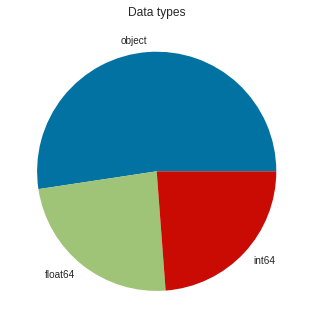

In [13]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [14]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


#### Which columns could be categorical ?

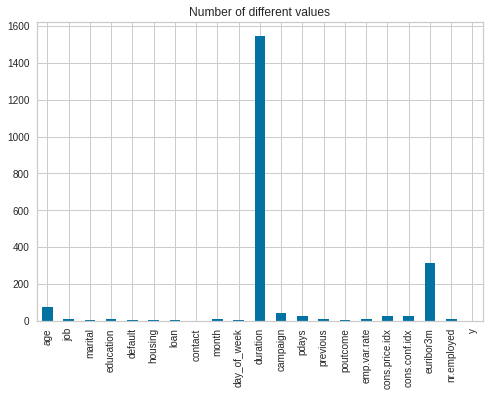

In [15]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [16]:
duplicates(df)

Number of rows before removing: 41188
Number of duplicate rows: 12
Number of rows after removing: 41176


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### Drop user's columns:

In [17]:
print('user_drop_cols = ', user_drop_cols)

user_drop_cols =  []


In [18]:
df = df.drop(user_drop_cols, axis=1)

#### Drop NaN:

In [19]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Final set of dropped columns

In [20]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [21]:
display(dropped_cols)

array([], dtype=float64)

#### Encoding data:

In [22]:
df, encoded_cols = encoding(df, threshold_cat)

Encoding numeric column: age
Encoding object column: job
Encoding object column: marital
Encoding object column: education
Encoding object column: default
Encoding object column: housing
Encoding object column: loan
Encoding object column: contact
Encoding object column: month
Encoding object column: day_of_week
Encoding numeric column: duration
Encoding numeric column: campaign
Encoding numeric column: pdays
Encoding numeric column: previous
Encoding object column: poutcome
Encoding numeric column: emp.var.rate
Encoding numeric column: cons.price.idx
Encoding numeric column: cons.conf.idx
Encoding numeric column: euribor3m
Encoding numeric column: nr.employed
Encoding object column: y


#### Imputing NaN using IterativeImputer

No handles with labels found to put in legend.


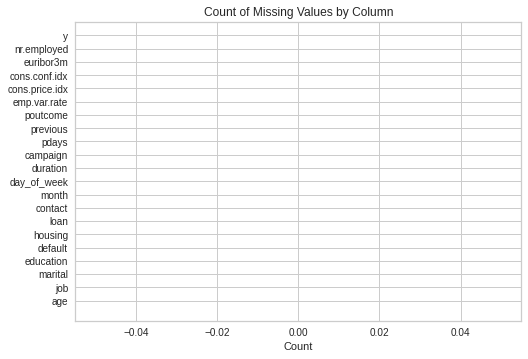

In [23]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

##### Imputation

In [24]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [25]:
df = downcast_dtypes(df)

Memory usage of dataframe is 6.60MB
Memory usage after optimization is: 1.22MB
Decreased by 81.5%


##### Dataframe structure after compression

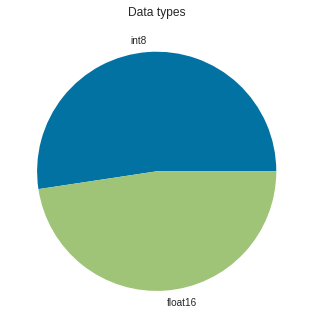

In [26]:
plot_dataframe_structure(df)

#### Outliers:

In [27]:
df = outliers(df, threshold_Z)

Using Z_score,  4844  rows will be suppressed.


#### Splitting dataframe in features and targets

In [28]:
y = df[target_col]

In [29]:
X = df.drop(target_col, axis=1)

### Plottings

#### Ranking 

##### Ranking 1D 

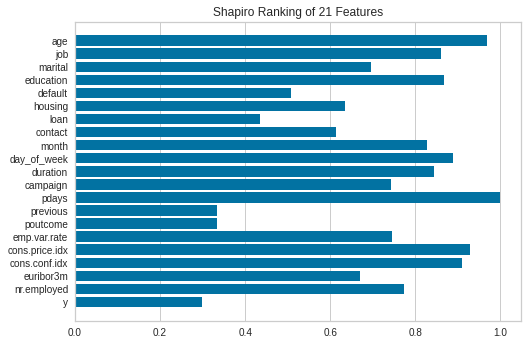

In [30]:
rank1d(df);

##### Ranking 2D 

###### Ranking 2D according to Pearson

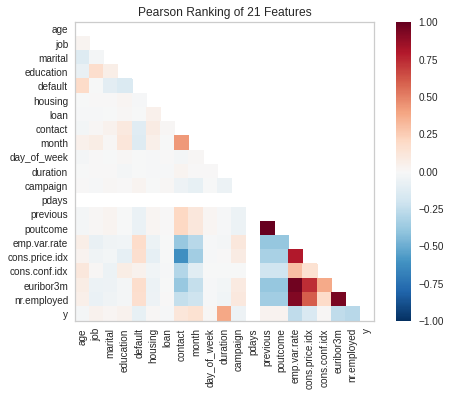

In [31]:
rank2d(df, algorithm='pearson');

###### Ranking 2D based on covariance

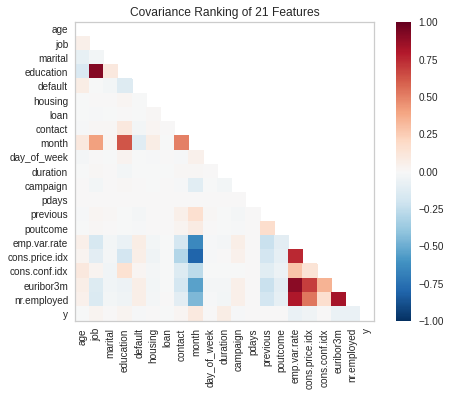

In [32]:
rank2d(df, algorithm='covariance');

###### Ranking 2D according to Spearman

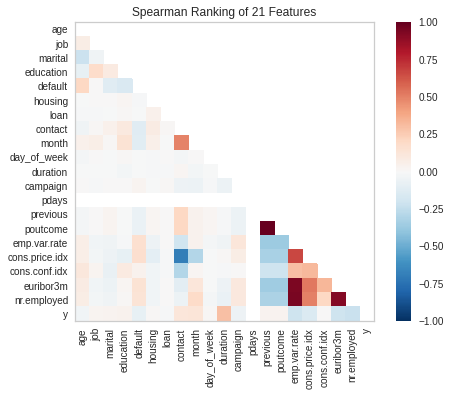

In [33]:
rank2d(df, algorithm='spearman');

###### Ranking 2D according to Kendalltau

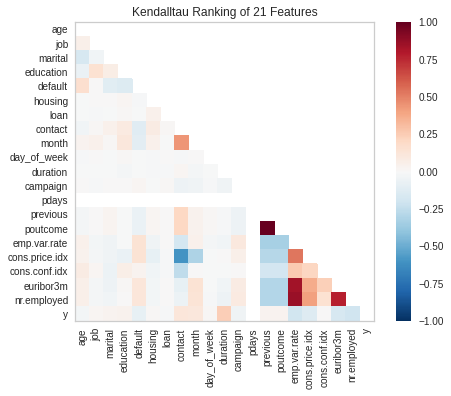

In [34]:
rank2d(df, algorithm='kendalltau');

#### Correlation

##### Correlation with Yellow Bricks

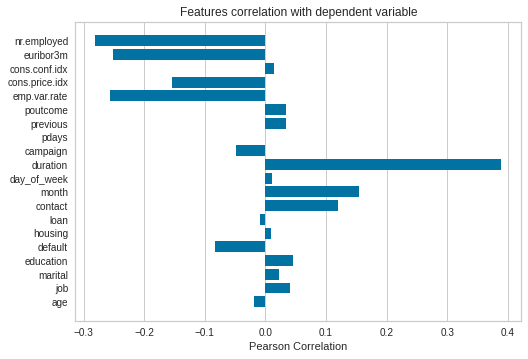

In [35]:
feature_correlation(X, y);

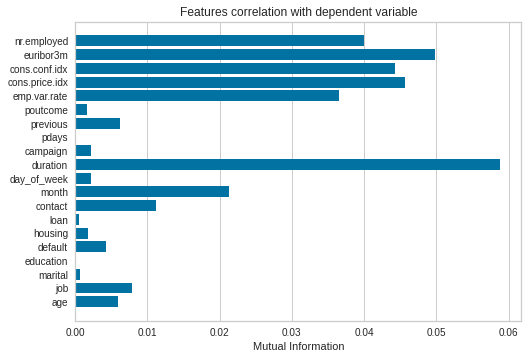

In [36]:
feature_correlation(X, y, method='mutual_info-classification');

#### Feature importance (a priori)

##### According to decision tree

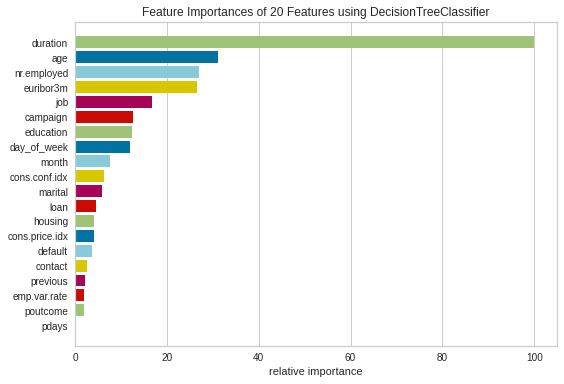

In [37]:
feature_importances(DecisionTreeClassifier(), X, y);

##### According to logistic regression

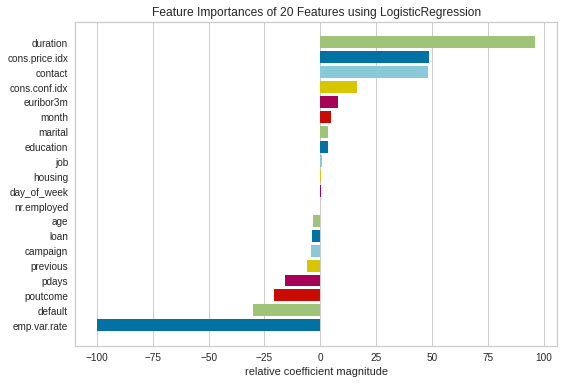

In [38]:
feature_importances(LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5), X, y);

#### PCA

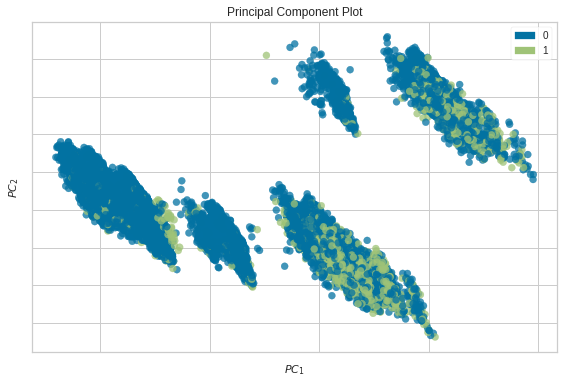

In [39]:
pca_decomposition(X, y.astype(int));

#### Class balancing

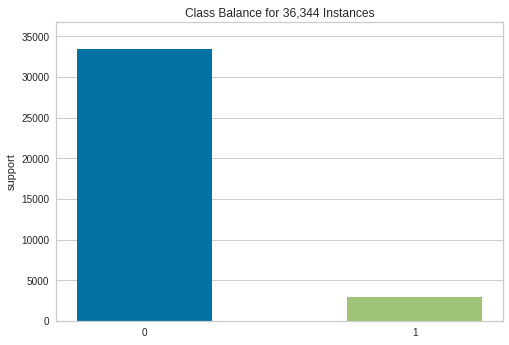

Entropy =  0.40086706383166504


In [40]:
class_balance(y)
print('Entropy = ', shannon_entropy(y))

## Splitting data in train and test sets 

In [41]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33, stratify=y)

## Modelling

### Model building

##### Simple model

In [42]:
model = XGBClassifier(max_depth=15, n_estimators=20, verbosity=0)

##### Possible other models based on decision trees:

In [43]:
# RandomForestClassifier(max_depth=5, n_estimators=10, max_features='auto')
# AdaBoostClassifier()
# XGBClassifier(max_depth=5, n_estimators=10, verbosity=0)


### Model fitting

In [44]:
%%time
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 5.01 s, sys: 462 ms, total: 5.47 s
Wall time: 1.59 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

#### Tree

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.755365 to fit


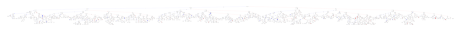

In [45]:
plot_tree(model)
plt.show()

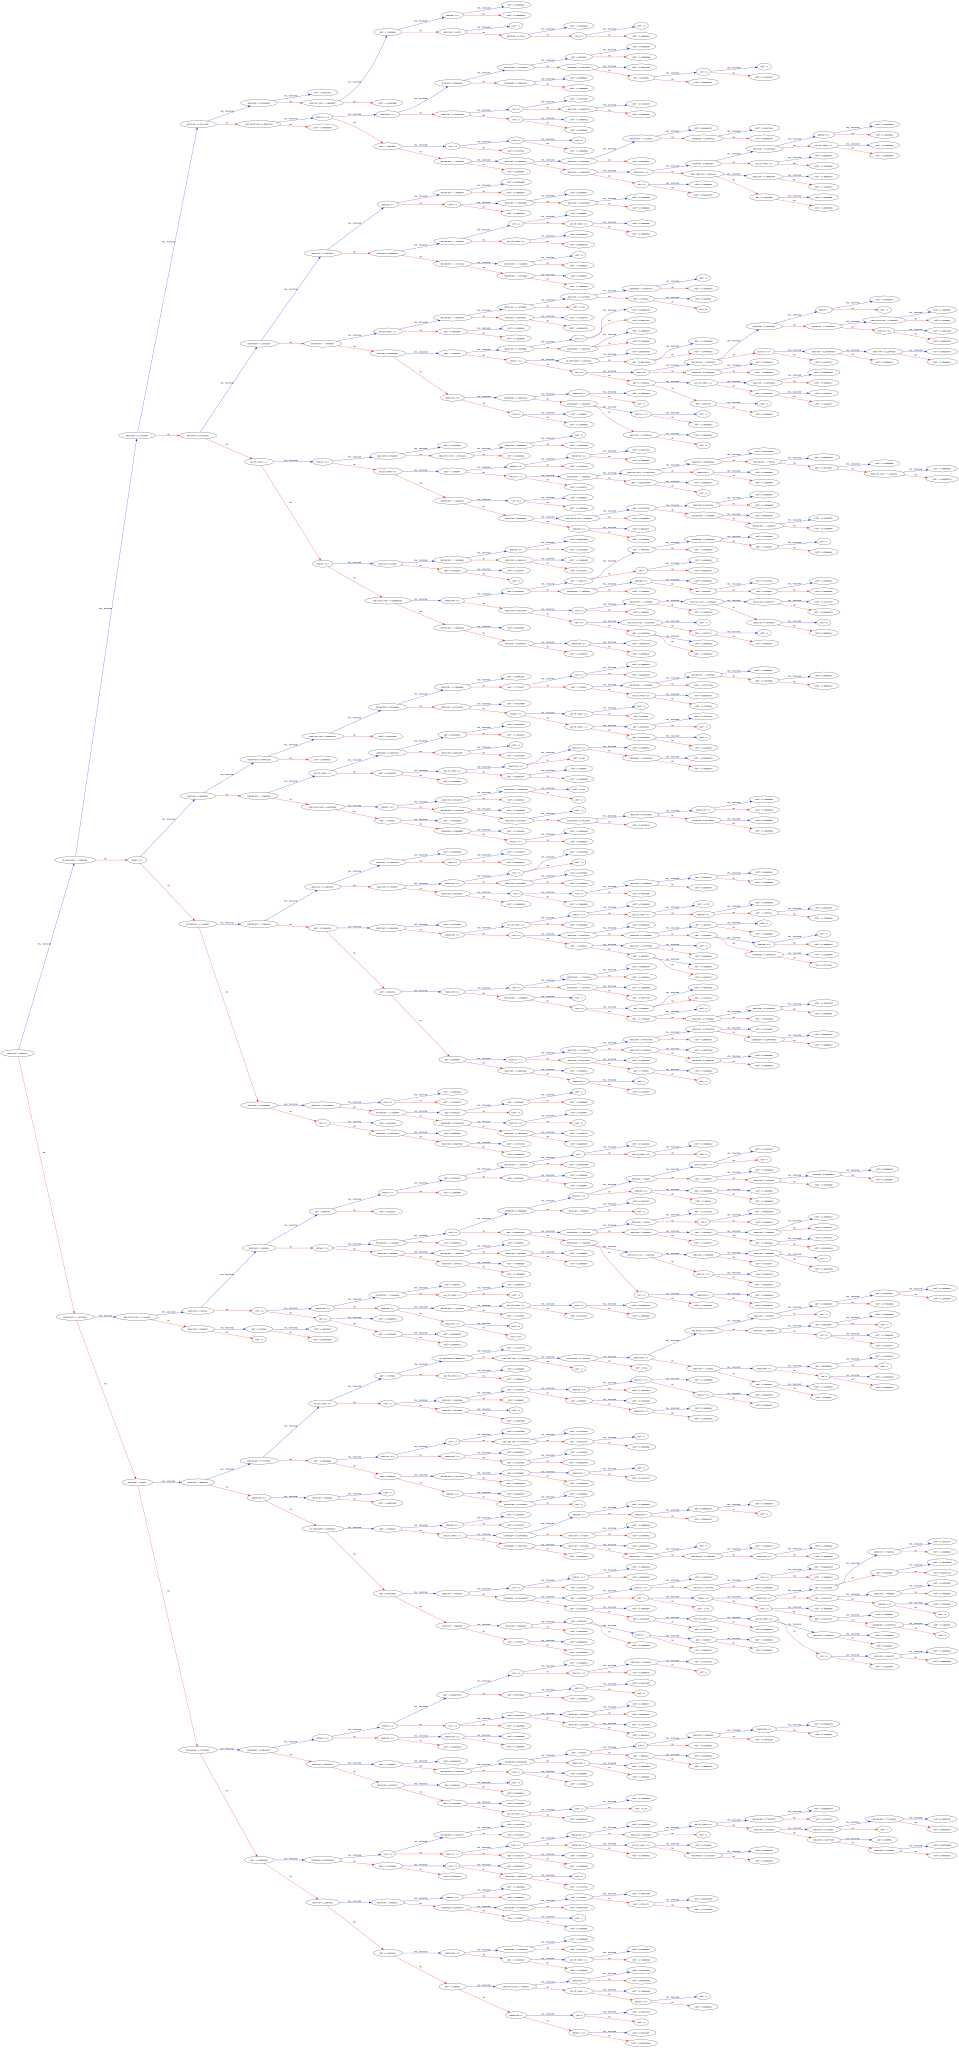

In [46]:
to_graphviz(model, num_trees=0, rankdir='LR')

### Model evaluation

#### Model scoring

In [47]:
print('Score on train set:', model.score(X_train, y_train))

Score on train set: 0.9976180698151951


In [48]:
print('Score on test set:', model.score(X_test, y_test))

Score on test set: 0.9235451058862765


#### Learning curve

dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state', 'scoring', 'shuffle', 'train_sizes', 'objective', 'use_label_encoder', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'num_parallel_tree', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity']) 


dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state', 'scoring', 'shuffle', 'train_sizes', 'objective', 'use_label_encoder', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_we

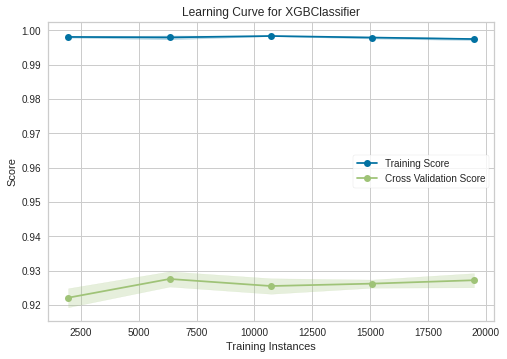

In [49]:
learning_curve(model, X_train, y_train, scoring='accuracy');

#### Feature permutation importance (a posteriori)

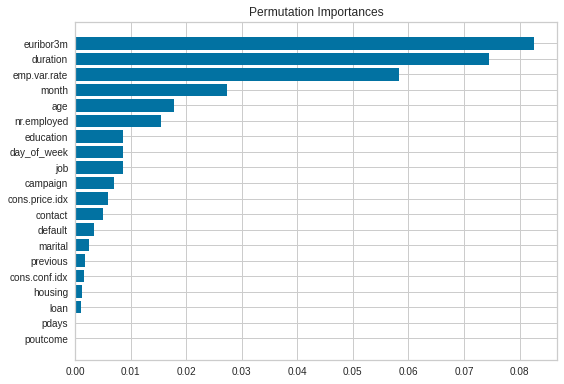

In [50]:
plot_perm_imp(model, X, y, scoring = 'accuracy');

#### ROC/AUC

In [51]:
classes = (y_train.append(y_test)).unique()

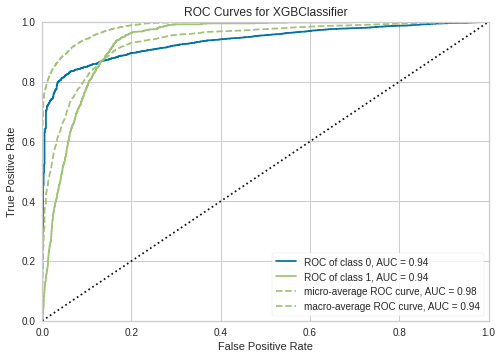

In [52]:
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes);

#### Classification report

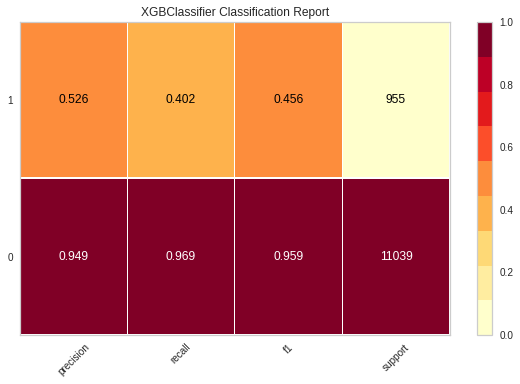

In [53]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

#### Confusion matrix

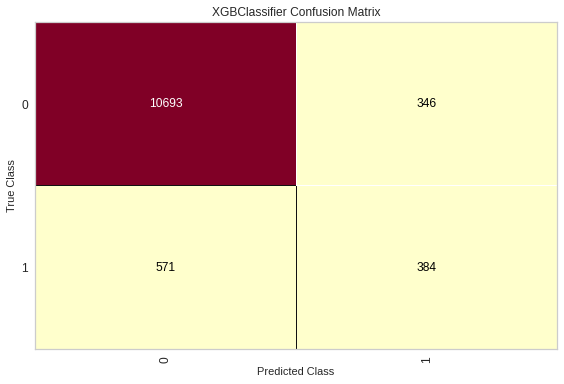

In [54]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

#### Class prediction error

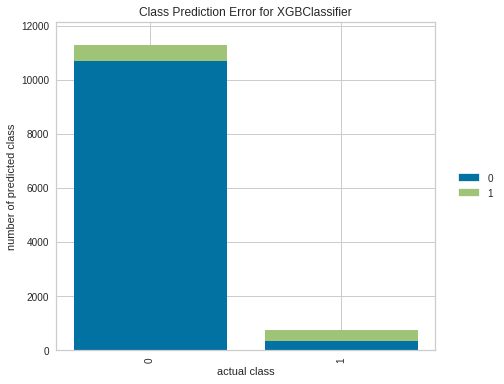

In [55]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);